# Prediksi Penjualan Kedelai

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

def formatuang(x,pos):
    frek = 0
    while abs(x) >= 1000:
        frek += 1
        x /= 1000
    return '%.2f%s' % (x,['','Ribu','Juta','Mlyr','Trln','Qdln'][frek])

def formatberat(x,pos):
    if x<=100 :
        return '%2.2f%s' % (x,'')
    elif x>=1000:
        return '%2.2f%s' % (x/1000,'Ton')
    else:
        return '%1.2f%s' % (x/100,'Kwintal')

In [3]:
df=pd.read_csv('ReportPenjualan.tsv',sep='\t')
df.head()

,Tanggal,Tujuan,Jenis,Harga jual,Jumlah,Driver,No. Polisi,Berat,Sisa,Keterangan
0,2022-12-28,NaN,Lotus,NaN,NaN,Tio,AG 9627 UB,8000,8,Datang
1,2023-01-02,MBAK ITA,Lotus,13000.0,26000000.0,Tio,AG 9627 UB,2000,6,Kirim
2,2023-01-02,MAS HERI,Lotus,13000.0,13000000.0,Tio,AG 9627 UB,1000,5,Kirim
3,2023-01-03,MAS RIZAL,Lotus,13000.0,650000.0,Tio,AG 9627 UB,50,"4,95",Kirim
4,2023-01-03,MAS YOGA,Lotus,13000.0,1950000.0,Tio,AG 9627 UB,150,"4,8",Kirim


In [4]:
df[df["Keterangan"]=="Datang"].head()

,Tanggal,Tujuan,Jenis,Harga jual,Jumlah,Driver,No. Polisi,Berat,Sisa,Keterangan
0,2022-12-28,NaN,Lotus,NaN,NaN,Tio,AG 9627 UB,8000,8,Datang
23,2023-01-05,NaN,Hiu,NaN,NaN,Bayu,W 8962 DO,10000,10,Datang
34,2023-01-06,NaN,Hiu,NaN,NaN,Bayu,W 8962 DO,4000,4,Datang
45,2023-01-07,NaN,Lotus,NaN,NaN,Bayu,W 8962 DO,5000,5,Datang
59,2023-01-07,NaN,Hiu,NaN,NaN,Bayu,W 8962 DO,9000,"8,9",Datang


In [5]:
df.dropna(subset=['Jumlah'],inplace=True)
df.head()

,Tanggal,Tujuan,Jenis,Harga jual,Jumlah,Driver,No. Polisi,Berat,Sisa,Keterangan
1,2023-01-02,MBAK ITA,Lotus,13000.0,26000000.0,Tio,AG 9627 UB,2000,6,Kirim
2,2023-01-02,MAS HERI,Lotus,13000.0,13000000.0,Tio,AG 9627 UB,1000,5,Kirim
3,2023-01-03,MAS RIZAL,Lotus,13000.0,650000.0,Tio,AG 9627 UB,50,"4,95",Kirim
4,2023-01-03,MAS YOGA,Lotus,13000.0,1950000.0,Tio,AG 9627 UB,150,"4,8",Kirim
5,2023-01-03,PAK SUNANDAR,Lotus,13000.0,1950000.0,Tio,AG 9627 UB,150,"4,65",Kirim


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1 to 1623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      1559 non-null   object 
 1   Tujuan       1558 non-null   object 
 2   Jenis        1559 non-null   object 
 3   Harga jual   1557 non-null   float64
 4   Jumlah       1559 non-null   float64
 5    Driver      1559 non-null   object 
 6    No. Polisi  1542 non-null   object 
 7   Berat        1559 non-null   int64  
 8   Sisa         1559 non-null   object 
 9   Keterangan   1559 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 134.0+ KB


In [7]:
df[df['Harga jual'].isna()]

,Tanggal,Tujuan,Jenis,Harga jual,Jumlah,Driver,No. Polisi,Berat,Sisa,Keterangan
1161,2023-04-02,MBAK ITA,Hiu,NaN,0.0,Bayu,W 8962 DO,500,"2,7",Kirim
1175,2023-04-03,MAS AINUN,Lotus,NaN,0.0,P Kentung,B 9705 FYU,2000,"7,45",Kirim


In [8]:
df['Harga jual']=df['Harga jual'].ffill(downcast='infer')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1 to 1623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      1559 non-null   object 
 1   Tujuan       1558 non-null   object 
 2   Jenis        1559 non-null   object 
 3   Harga jual   1559 non-null   int64  
 4   Jumlah       1559 non-null   float64
 5    Driver      1559 non-null   object 
 6    No. Polisi  1542 non-null   object 
 7   Berat        1559 non-null   int64  
 8   Sisa         1559 non-null   object 
 9   Keterangan   1559 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 134.0+ KB


In [10]:
df['Tujuan']=df['Tujuan'].fillna('TIDAK TAHU')

In [11]:
df[df['Jumlah']==0]

,Tanggal,Tujuan,Jenis,Harga jual,Jumlah,Driver,No. Polisi,Berat,Sisa,Keterangan
1161,2023-04-02,MBAK ITA,Hiu,10700,0.0,Bayu,W 8962 DO,500,"2,7",Kirim
1175,2023-04-03,MAS AINUN,Lotus,11000,0.0,P Kentung,B 9705 FYU,2000,"7,45",Kirim


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1 to 1623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      1559 non-null   object 
 1   Tujuan       1559 non-null   object 
 2   Jenis        1559 non-null   object 
 3   Harga jual   1559 non-null   int64  
 4   Jumlah       1559 non-null   float64
 5    Driver      1559 non-null   object 
 6    No. Polisi  1542 non-null   object 
 7   Berat        1559 non-null   int64  
 8   Sisa         1559 non-null   object 
 9   Keterangan   1559 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 134.0+ KB


In [13]:
for i in (df.iloc[:][df['Jumlah']==0].index):
    df['Jumlah'][i]=df['Harga jual'][i]*df['Berat'][i]

In [14]:
df[df['Jumlah']==0]

,Tanggal,Tujuan,Jenis,Harga jual,Jumlah,Driver,No. Polisi,Berat,Sisa,Keterangan


## Data Preprocessing

In [21]:
df_jual=df.copy()
df_jual.drop(df_jual.columns[[1,2,3,5,6,7,8,9]],axis=1,inplace=True)
df_jual.head()

,Tanggal,Jumlah
1,2023-01-02,26000000.0
2,2023-01-02,13000000.0
3,2023-01-03,650000.0
4,2023-01-03,1950000.0
5,2023-01-03,1950000.0


In [22]:
df_jual['Tanggal'] = pd.to_datetime(df_jual['Tanggal'], format='%Y/%m/%d')

In [23]:
df_jual = df_jual.sort_values('Tanggal')

print(df_jual.head())

df_jual.isnull().sum()
df_jual.info()

     Tanggal      Jumlah
1 2023-01-02  26000000.0
2 2023-01-02  13000000.0
3 2023-01-03    650000.0
4 2023-01-03   1950000.0
5 2023-01-03   1950000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1 to 1623
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1559 non-null   datetime64[ns]
 1   Jumlah   1559 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.5 KB


In [25]:
df_jual.groupby('Tanggal')['Jumlah'].sum().reset_index()

print(df_jual['Tanggal'].min())
print(df_jual['Tanggal'].max())

2023-01-02 00:00:00
2023-05-18 00:00:00


In [26]:
df_jual = df_jual.set_index('Tanggal')
df_jual.index

DatetimeIndex(['2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03',
               '2023-01-03', '2023-01-03', '2023-01-04', '2023-01-04',
               '2023-01-04', '2023-01-04',
               ...
               '2023-05-18', '2023-05-18', '2023-05-18', '2023-05-18',
               '2023-05-18', '2023-05-18', '2023-05-18', '2023-05-18',
               '2023-05-18', '2023-05-18'],
              dtype='datetime64[ns]', name='Tanggal', length=1559, freq=None)

In [27]:
y = df_jual['Jumlah'].resample('2D',label='left',closed='left').mean()
y

Tanggal
2023-01-02    7.475000e+06
2023-01-04    8.276818e+06
2023-01-06    4.529444e+06
2023-01-08    5.210714e+06
2023-01-10    3.180962e+06
                  ...     
2023-05-10    3.690000e+06
2023-05-12    5.232500e+06
2023-05-14    1.863750e+06
2023-05-16    3.223250e+06
2023-05-18    2.083421e+06
Freq: 2D, Name: Jumlah, Length: 69, dtype: float64

## Data Visualization

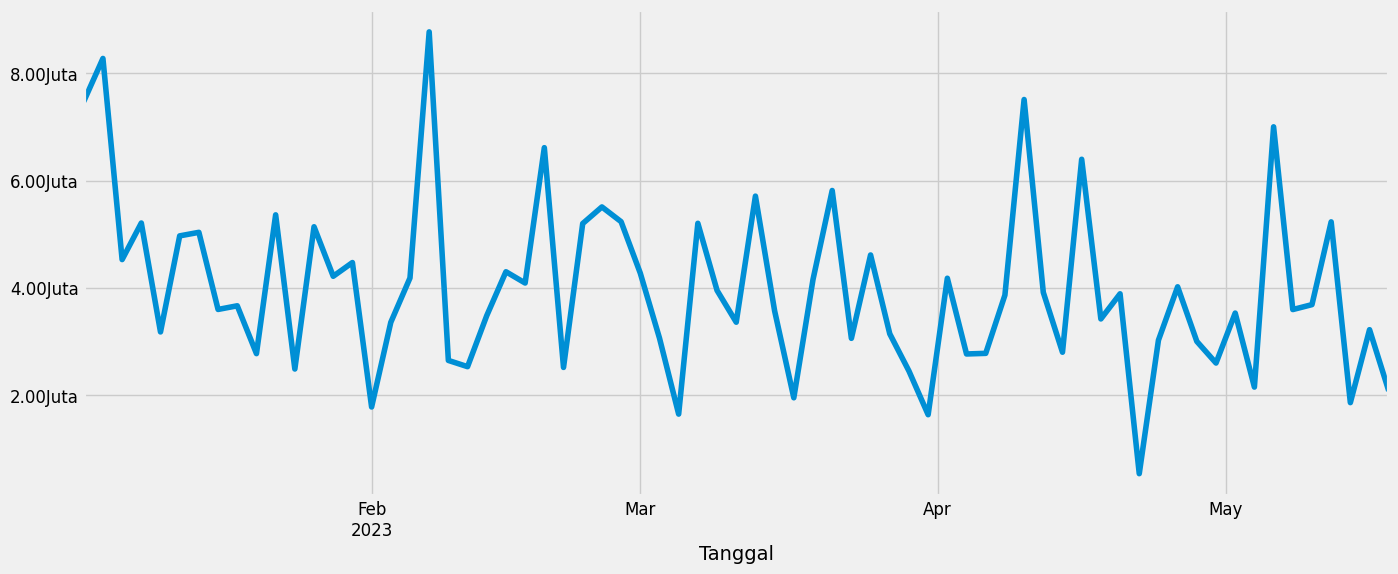

In [28]:
from matplotlib.ticker import FuncFormatter
y.plot(figsize = (15, 6)).yaxis.set_major_formatter(FuncFormatter(formatuang))
plt.show()

### Dekomposisi Time-series 

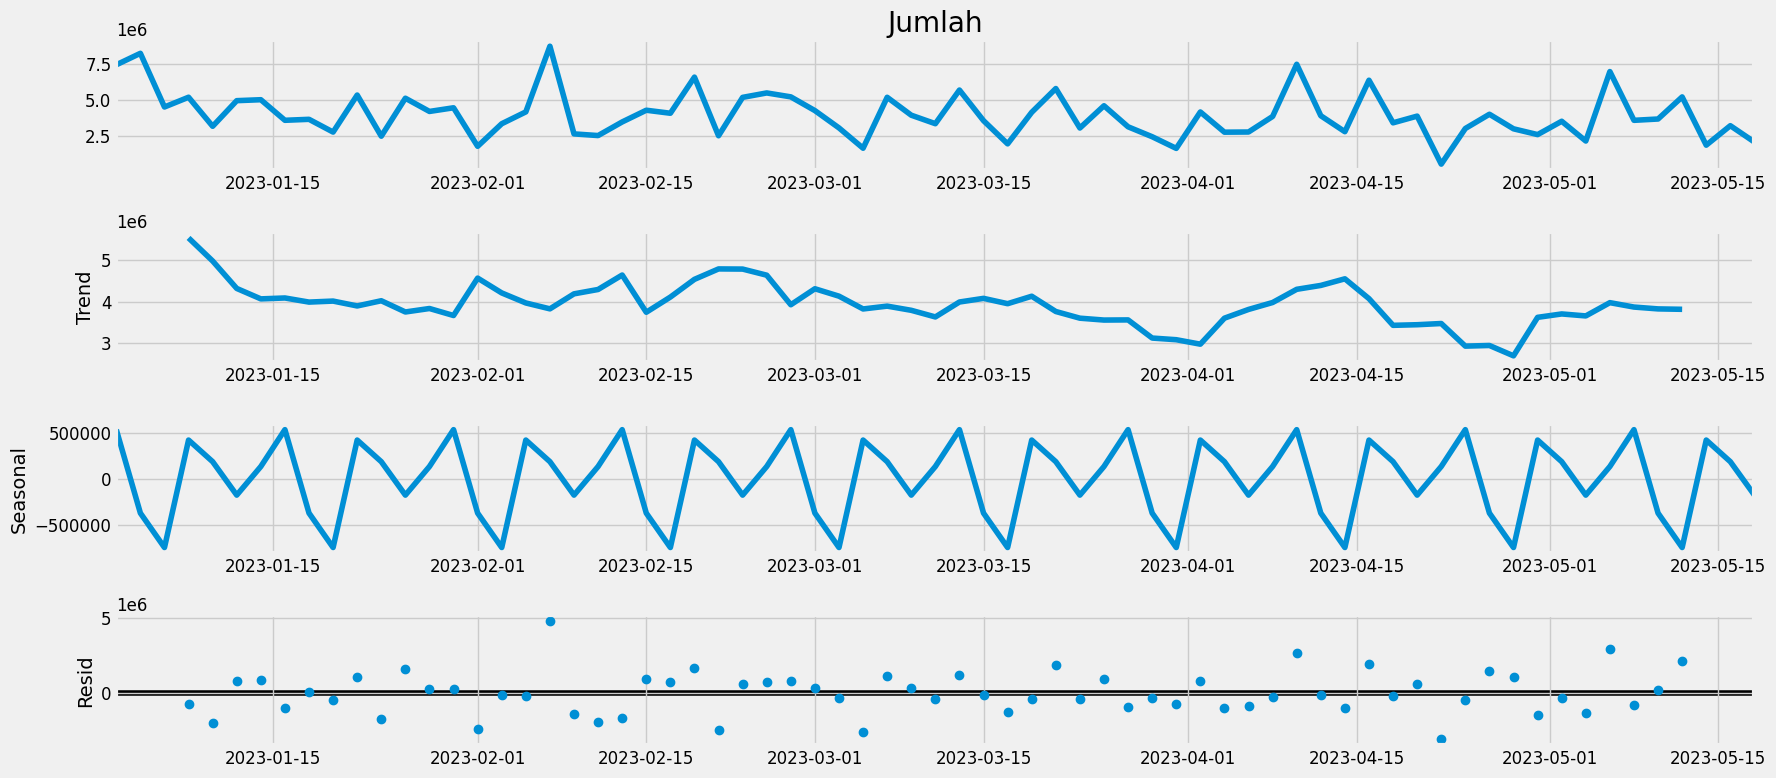

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting dengan ARIMA

<p>
    <b><i>ARIMA</i></b>
<ul>
    <li>ARIMA yaitu <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA biasa dinotasikan dengan <i>ARIMA(p, d, q)</i></li>
    <li>Dimana<br>
        <ul>
    <li>p merupakan orde untuk proses <i>autoreggresive</i>(AR)</li>
    <li>d merupakan orde yang menyatakan banyaknya proses diferensi dilakukan pada data <i>time series</i> yang tidak stasioner</li>
    <li>q merupakan orde yang menyatakan proses <i>moving average</i>(MA)</li></ul>
    </li>
</ul>
</p>

In [30]:
p = d = q = range(0, 3)

#Kombinasi yang mungkin untuk p, d dan q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Contoh kombinasi parameter ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Contoh kombinasi parameter ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [31]:
baris=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            baris.append(['ARIMA{}x{}'.format(param, param_seasonal),result.aic])
        except:
            continue
hasil = pd.DataFrame(baris,columns=['ARIMA','AIC'])
print(hasil.sort_values(['AIC']))

                            ARIMA          AIC
709  ARIMA(2, 2, 2)x(0, 2, 2, 12)  1436.312143
718  ARIMA(2, 2, 2)x(1, 2, 2, 12)  1437.550832
725  ARIMA(2, 2, 2)x(2, 2, 0, 12)  1438.126406
716  ARIMA(2, 2, 2)x(1, 2, 0, 12)  1438.744692
727  ARIMA(2, 2, 2)x(2, 2, 2, 12)  1439.382292
..                            ...          ...
358  ARIMA(1, 1, 1)x(0, 2, 1, 12)  4372.104542
600  ARIMA(2, 1, 1)x(0, 2, 1, 12)  4373.540546
573  ARIMA(2, 1, 0)x(0, 2, 1, 12)  4377.256411
331  ARIMA(1, 1, 0)x(0, 2, 1, 12)  4384.493531
169  ARIMA(0, 2, 0)x(0, 2, 1, 12)  4395.739255

[728 rows x 2 columns]


### Mencari model ARIMA yang cocok

In [38]:
model = sm.tsa.statespace.SARIMAX(y, order = (2, 2, 2), seasonal_order = (0, 2, 2, 12) ) 
result = model.fit() 
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Jumlah   No. Observations:                   69
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -711.156
Date:                            Mon, 29 May 2023   AIC                           1436.312
Time:                                    09:52:51   BIC                           1448.641
Sample:                                01-02-2023   HQIC                          1440.858
                                     - 05-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2354      1.069     -0.220      0.826      -2.330       1.859
ar.L2         -0.2709      1.027   

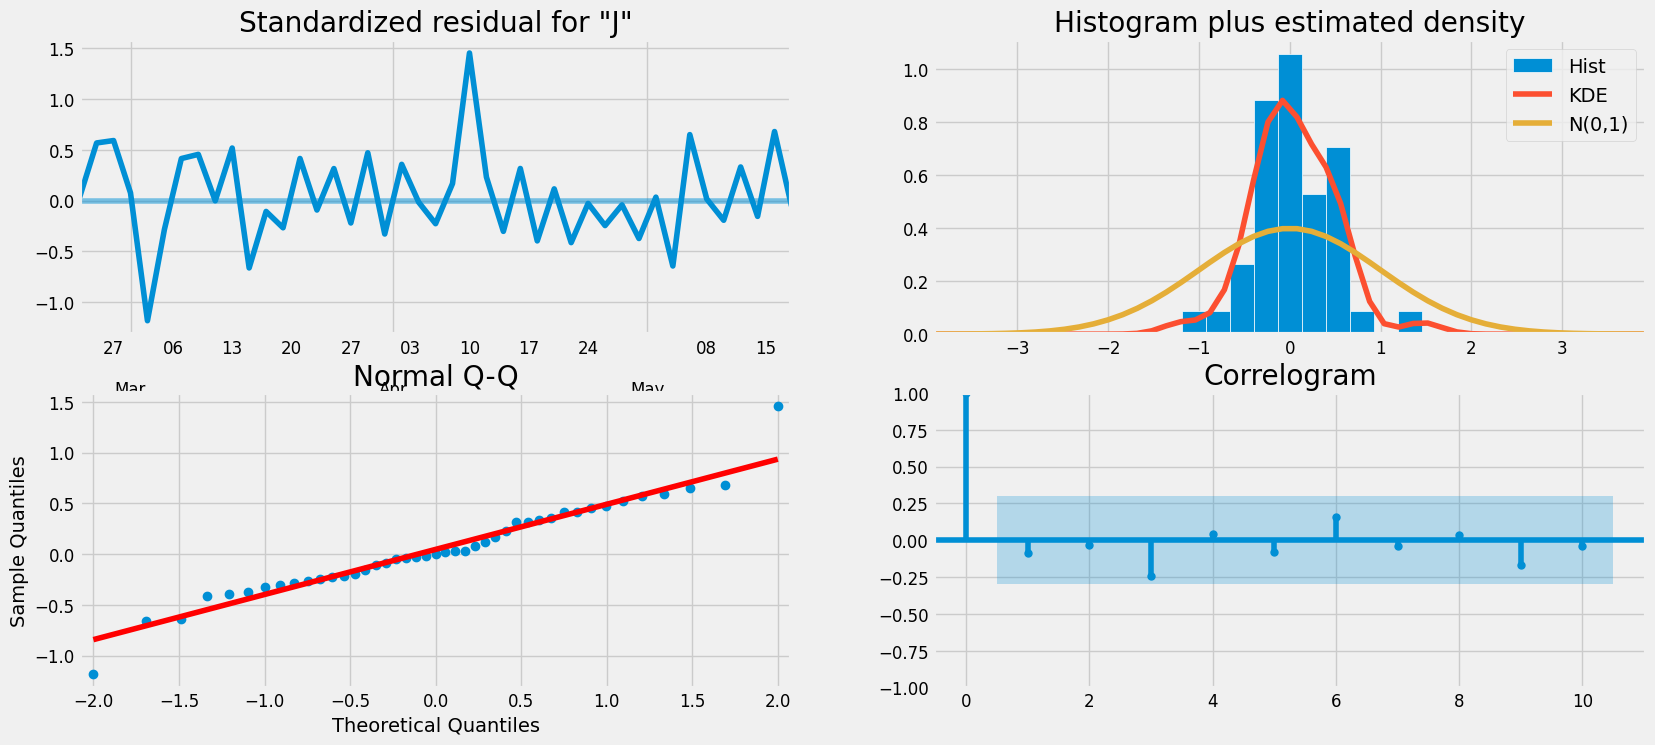

In [39]:
result.plot_diagnostics(figsize = (18, 8))
plt.show()

### Validasi

In [40]:
prediction = result.get_prediction(start = pd.to_datetime('2023-05-02'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Jumlah,upper Jumlah
Tanggal,,
2023-05-02,-7.280461e+06,1.397843e+07
2023-05-04,-4.980318e+06,1.627857e+07
2023-05-06,-7.152653e+06,1.410622e+07
2023-05-08,-7.118369e+06,1.414050e+07
2023-05-10,-5.887450e+06,1.537139e+07
2023-05-12,-7.193661e+06,1.406512e+07
2023-05-14,-7.921608e+06,1.333716e+07
2023-05-16,-1.109621e+07,1.016256e+07
2023-05-18,-8.256712e+06,1.300167e+07


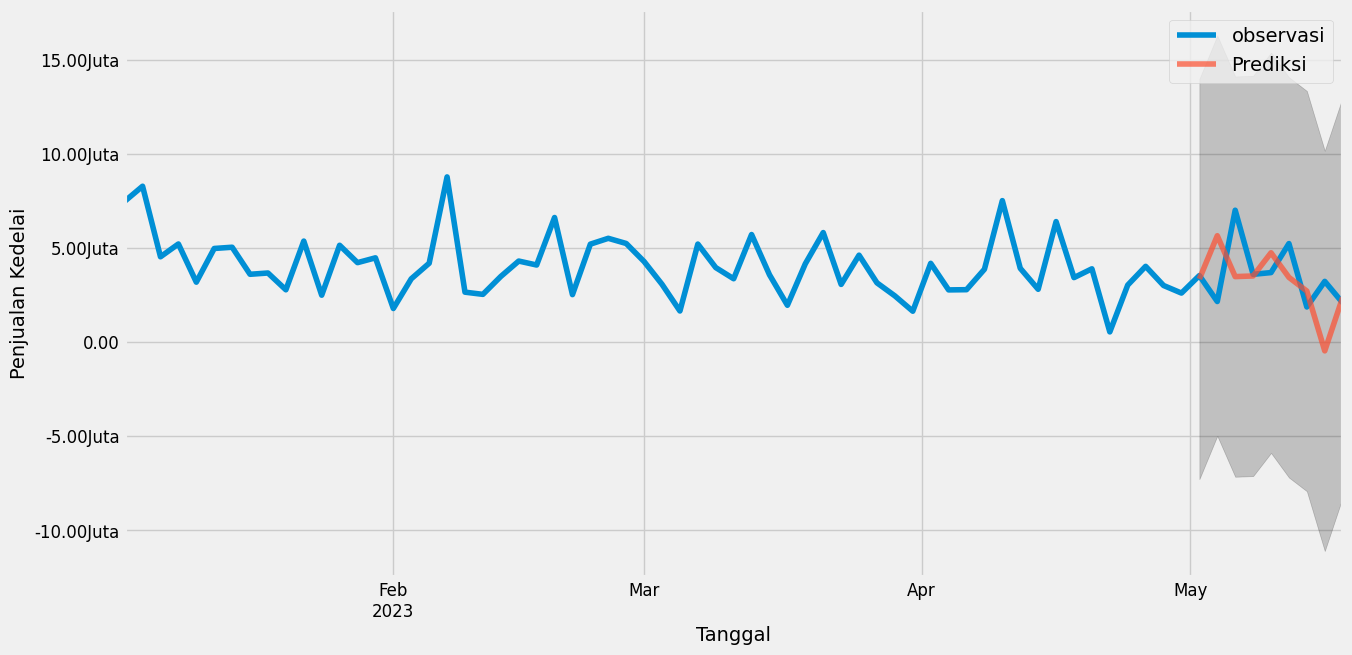

In [41]:
ax = y.plot(label = 'observasi')
prediction.predicted_mean.plot(ax = ax, label = 'Prediksi', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.yaxis.set_major_formatter(FuncFormatter(formatuang))
ax.set_xlabel("Tanggal")
ax.set_ylabel('Penjualan Kedelai')
plt.legend()
plt.show()

### Analisa Eror

In [42]:
y_hat = prediction.predicted_mean
y_truth = y['2023-05-02':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(rmse, 2)))


MSE 4826881849127.33
RMSE 2197016.58


### Visualisasi

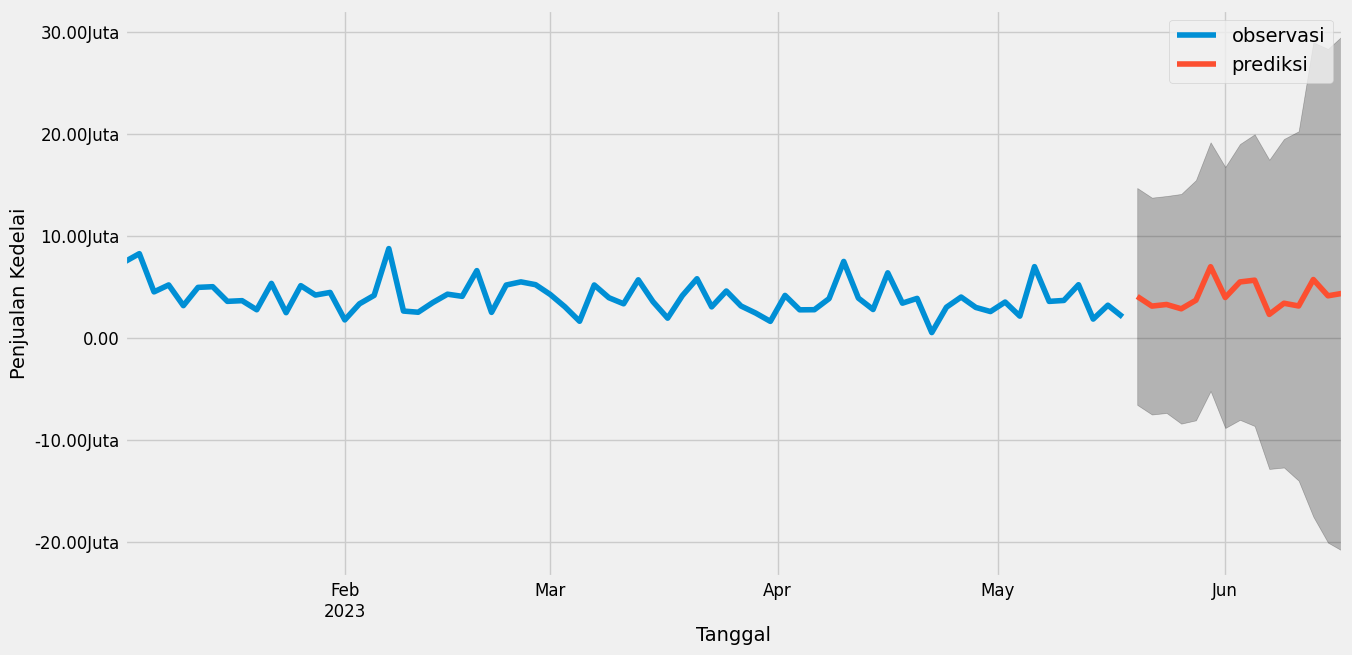

In [118]:
pred_uc = result.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observasi', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'prediksi')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.yaxis.set_major_formatter(FuncFormatter(formatuang))
ax.set_xlabel('Tanggal')
ax.set_ylabel('Penjualan Kedelai')

plt.legend()
plt.show()

### Simpulan

Prediksi pendapatan harian untuk sebulan kedepan masih naik turun dengan puncak kenaikan pada akhir bulan dan puncak penurunan pada tengah bulan

# Agregasi pembeli

In [49]:
df_beli=df.copy()
df_beli.drop(df_beli.columns[[0,2,3,5,6,8,9]],axis=1,inplace=True)
df_beli.head()

,Tujuan,Jumlah,Berat
1,MBAK ITA,26000000.0,2000
2,MAS HERI,13000000.0,1000
3,MAS RIZAL,650000.0,50
4,MAS YOGA,1950000.0,150
5,PAK SUNANDAR,1950000.0,150


In [50]:
import re
import string
import unicodedata
from tqdm.notebook import tqdm
def preprocessing(text):
    text=text.upper()
    text=re.sub(r"\s+", " ", text, flags=re.UNICODE) # menghilangkan whitespace (ruang kosong)
    text=unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii")
    return " ".join(text.split())
df_beli["Tujuan"] = [preprocessing(x) for x in tqdm(df_beli["Tujuan"].values)]
df_beli.head()

  0%|          | 0/1559 [00:00<?, ?it/s]

,Tujuan,Jumlah,Berat
1,MBAK ITA,26000000.0,2000
2,MAS HERI,13000000.0,1000
3,MAS RIZAL,650000.0,50
4,MAS YOGA,1950000.0,150
5,PAK SUNANDAR,1950000.0,150


In [51]:
df_beli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1 to 1623
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tujuan  1559 non-null   object 
 1   Jumlah  1559 non-null   float64
 2   Berat   1559 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 81.0+ KB


In [52]:
df_beli1=df_beli.copy()
df_beli1.drop(df_beli1.columns[[2]],axis=1,inplace=True)
df_beli1=df_beli1.groupby(['Tujuan']).sum()
df_beli1=df_beli1.sort_values(by=['Jumlah'],ascending=False).reset_index()
df_beli1

,Tujuan,Jumlah
0,MAS HERI,1.347280e+09
1,MBAK ITA,8.431650e+08
2,ABAH KONYAR,4.464000e+08
3,BU ISWATI,3.660150e+08
4,MAS AZAM,2.243750e+08
...,...,...
132,BU ANI,5.400000e+05
133,PAK MUNARI,5.400000e+05
134,YOGA,5.400000e+05
135,BU AS,5.350000e+05


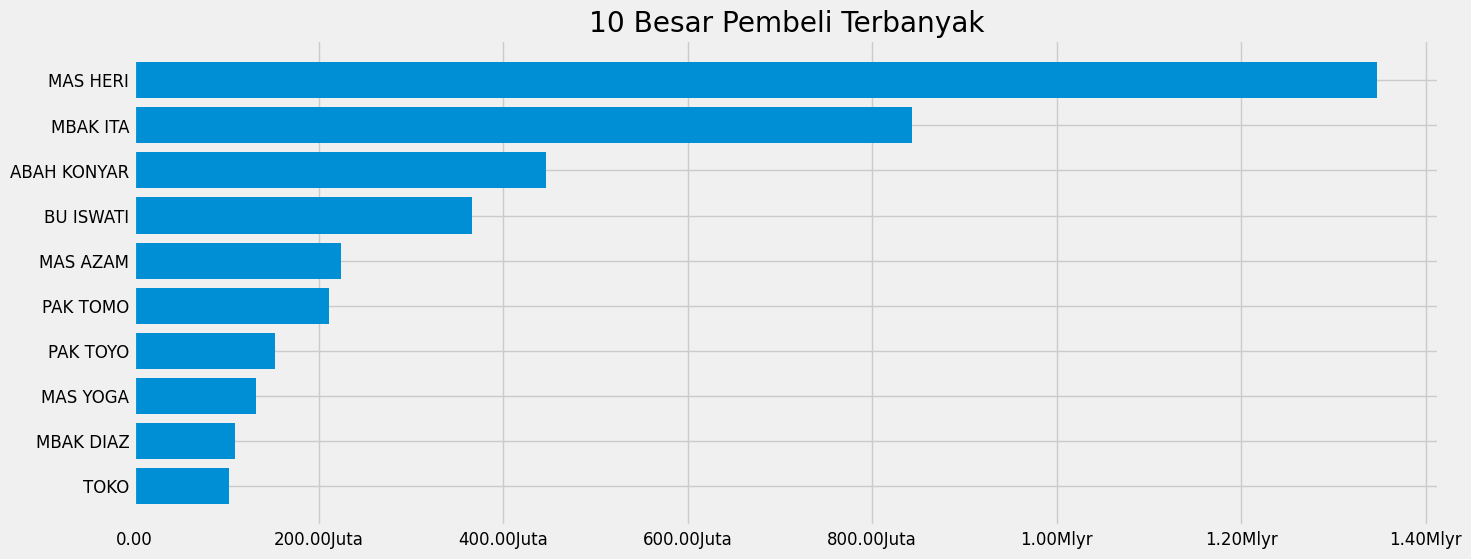

In [53]:
fig,ax=plt.subplots(figsize = (15, 6))
ax.barh(df_beli1['Tujuan'].head(10),df_beli1['Jumlah'].head(10))
ax.xaxis.set_major_formatter(FuncFormatter(formatuang))
ax.invert_yaxis()
ax.set_title('10 Besar Pembeli Terbanyak')
plt.show()

In [54]:
df_beli2=df_beli.copy()
df_beli2.drop(df_beli2.columns[[1]],axis=1,inplace=True)
df_beli2=df_beli2.groupby(['Tujuan']).sum()
df_beli2=df_beli2.sort_values(by=['Berat'],ascending=False).reset_index()
df_beli2

,Tujuan,Berat
0,MAS HERI,120000
1,MBAK ITA,74350
2,ABAH KONYAR,39000
3,BU ISWATI,33600
4,MAS AZAM,20050
...,...,...
132,MAS FREN,50
133,CAK MO,50
134,PAK PAAT,50
135,PAK SUGIMAN,50


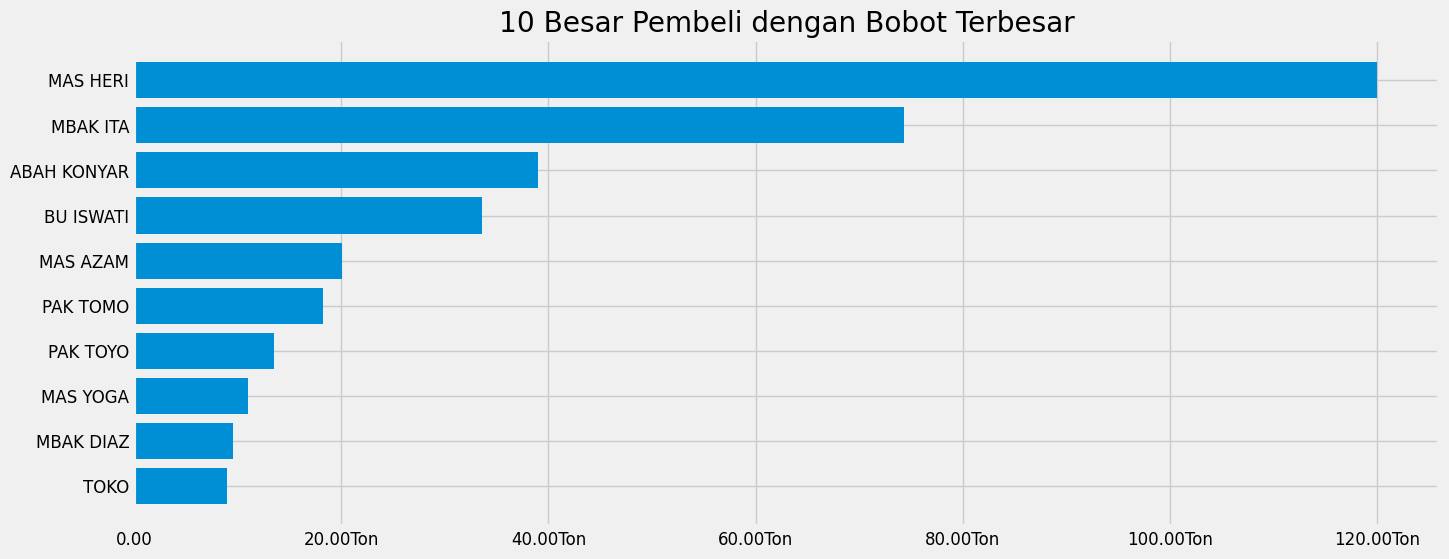

In [55]:
fig,ax=plt.subplots(figsize = (15, 6))
ax.barh(df_beli2['Tujuan'].head(10),df_beli2['Berat'].head(10))
ax.xaxis.set_major_formatter(FuncFormatter(formatberat))
ax.invert_yaxis()
ax.set_title('10 Besar Pembeli dengan Bobot Terbesar')
plt.show()

### Simpulan

Pembelian dengan jumlah uang dan berat terbanyak yaitu 
<ol>
    <li>MAS HERI</li>
    <li>MBAK ITA</li>
    <li>ABAH KONYAR</li>
</ol>

# Agregasi barang

In [56]:
df.Jenis.unique()

array(['Lotus', 'Hiu', 'Polos', 'Pecah'], dtype=object)

In [108]:
df_jenis=df.copy()
df_jenis.drop(df_jenis.columns[[1,3,4,5,6,8,9]],axis=1,inplace=True)
df_jenis.head()

,Tanggal,Jenis,Berat
1,2023-01-02,Lotus,2000
2,2023-01-02,Lotus,1000
3,2023-01-03,Lotus,50
4,2023-01-03,Lotus,150
5,2023-01-03,Lotus,150


In [109]:
df_jenis=df_jenis.pivot(columns=['Jenis'],values='Berat').set_index(df_jenis['Tanggal']).reset_index()
df_jenis=df_jenis.groupby(['Tanggal']).sum()
df_jenis.head()

Jenis,Hiu,Lotus,Pecah,Polos
Tanggal,,,,
2023-01-02,0.0,3000.0,0.0,0.0
2023-01-03,0.0,450.0,0.0,0.0
2023-01-04,0.0,3900.0,0.0,0.0
2023-01-05,9600.0,650.0,0.0,0.0
2023-01-06,4300.0,0.0,0.0,0.0


In [83]:
Lotus=[]
Hiu=[]
Polos=[]
Pecah=[]
for i in df_jenis.Jenis:
    if (i=='Lotus'):
        Lotus.append(df_jenis.Berat)
        Hiu.append(0)
        Polos.append(0)
        Pecah.append(0)
    elif (i=='Hiu'):
        Lotus.append(0)
        Hiu.append(df_jenis.Berat)
        Polos.append(0)
        Pecah.append(0)
    elif (i=='Polos'):
        Lotus.append(0)
        Hiu.append(0)
        Polos.append(df_jenis.Berat)
        Pecah.append(0)
    elif (i=='Pecah'):
        Lotus.append(0)
        Hiu.append(0)
        Polos.append(0)
        Pecah.append(df_jenis.Berat)
df_jenis['Lotus']=Lotus
df_jenis['Hiu']=Hiu
df_jenis['Polos']=Polos
df_jenis['Pecah']=Pecah
df_jenis.head()

,Tanggal,Jenis,Berat,Lotus,Hiu,Polos,Pecah
1,2023-01-02,Lotus,2000,1 2000 2 1000 3 50 4 ...,0,0,0
2,2023-01-02,Lotus,1000,1 2000 2 1000 3 50 4 ...,0,0,0
3,2023-01-03,Lotus,50,1 2000 2 1000 3 50 4 ...,0,0,0
4,2023-01-03,Lotus,150,1 2000 2 1000 3 50 4 ...,0,0,0
5,2023-01-03,Lotus,150,1 2000 2 1000 3 50 4 ...,0,0,0


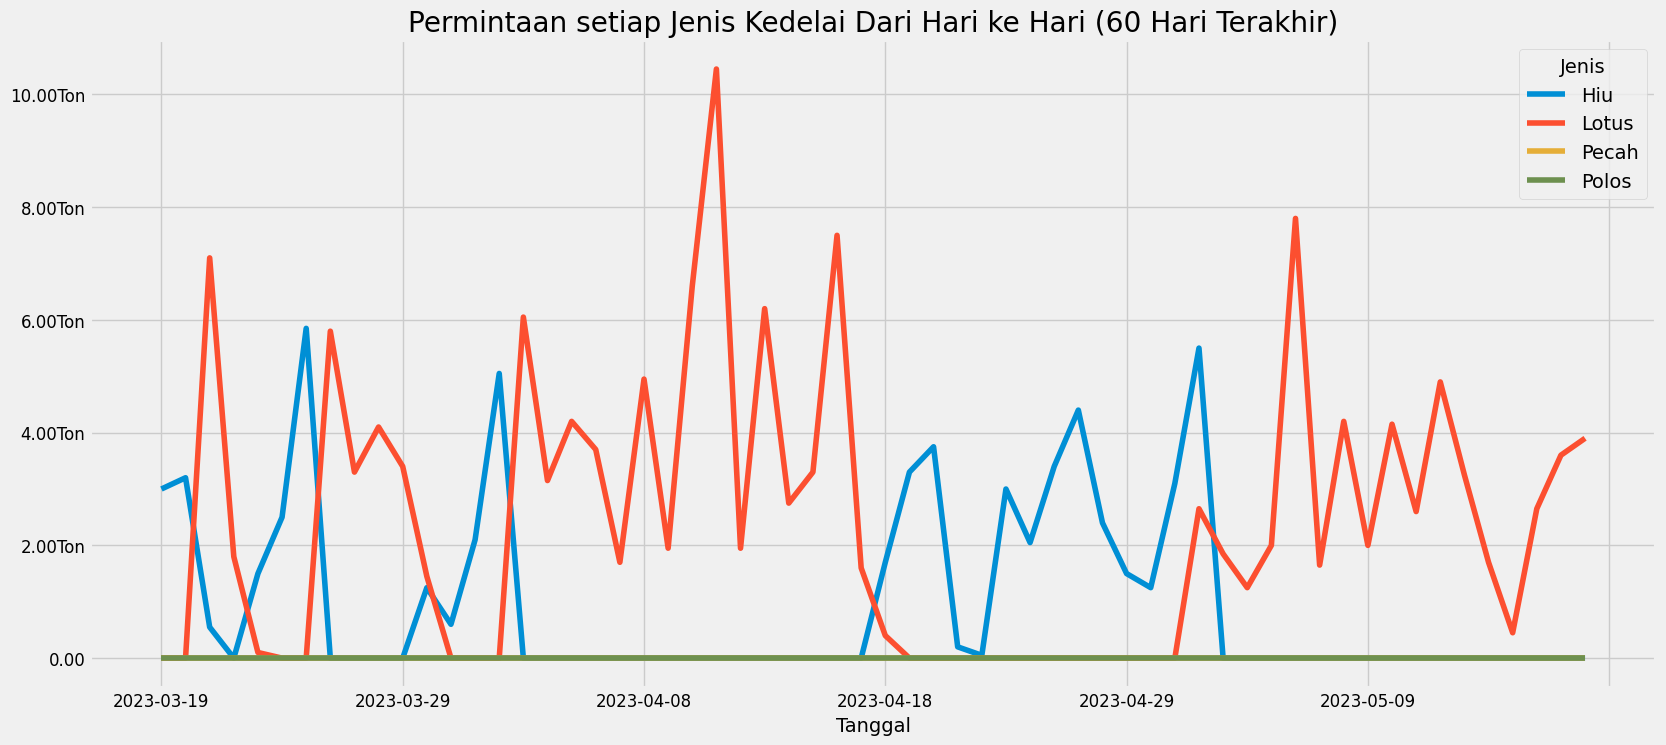

In [117]:
df_jenis[-60:].plot(title='Permintaan setiap Jenis Kedelai Dari Hari ke Hari (60 Hari Terakhir)').yaxis.set_major_formatter(FuncFormatter(formatberat))

### Simpulan

Permintaan kedelai pada 60 hari terakhir hanya pada 2 jenis kedelai yaitu: **Lotus** dan **Hiu**